<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.004468,60.294284,74.907160,0.000750,168.206662,168.205764,0.000898
1,0.0,1.0,96.871926,71.136469,95.530258,0.001063,273.539717,273.538563,0.001154
2,0.0,2.0,46.634901,94.741812,83.475557,0.000166,234.852437,234.852581,-0.000144
3,0.0,3.0,86.024110,92.016207,81.848435,0.000152,269.888904,269.888963,-0.000059
4,0.0,4.0,73.827473,96.703436,38.612142,-0.000051,219.143000,219.143317,-0.000317
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.596754,87.191779,31.957770,-0.000357,180.745945,180.746446,-0.000501
249996,999.0,246.0,66.617613,36.490863,72.659592,0.000936,185.769004,185.768144,0.000860
249997,999.0,247.0,60.753275,99.496735,71.084075,-0.000018,241.334066,241.334025,0.000041
249998,999.0,248.0,47.526080,29.052711,29.499410,0.000301,116.078502,116.078479,0.000023


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.004468,60.294284,74.907160,0.000750,168.206662,168.205764,0.000898
1,0.0,1.0,96.871926,71.136469,95.530258,0.001063,273.539717,273.538563,0.001154
2,0.0,2.0,46.634901,94.741812,83.475557,0.000166,234.852437,234.852581,-0.000144
3,0.0,3.0,86.024110,92.016207,81.848435,0.000152,269.888904,269.888963,-0.000059
4,0.0,4.0,73.827473,96.703436,38.612142,-0.000051,219.143000,219.143317,-0.000317
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.596754,87.191779,31.957770,-0.000357,180.745945,180.746446,-0.000501
249996,999.0,246.0,66.617613,36.490863,72.659592,0.000936,185.769004,185.768144,0.000860
249997,999.0,247.0,60.753275,99.496735,71.084075,-0.000018,241.334066,241.334025,0.000041
249998,999.0,248.0,47.526080,29.052711,29.499410,0.000301,116.078502,116.078479,0.000023


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    23.004468  60.294284  74.907160  0.000750  168.206662   
      1.0    96.871926  71.136469  95.530258  0.001063  273.539717   
      2.0    46.634901  94.741812  83.475557  0.000166  234.852437   
      3.0    86.024110  92.016207  81.848435  0.000152  269.888904   
      4.0    73.827473  96.703436  38.612142 -0.000051  219.143000   
...                ...        ...        ...       ...         ...   
999.0 245.0  51.596754  87.191779  31.957770 -0.000357  180.745945   
      246.0  66.617613  36.490863  72.659592  0.000936  185.769004   
      247.0  60.753275  99.496735  71.084075 -0.000018  241.334066   
      248.0  47.526080  29.052711  29.499410  0.000301  116.078502   
      249.0  97.191040  32.240629  48.309479  0.001737  187.742884   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.205764  0.000898  
      1.0    273.538563  0.001154  
      2.0    234.852581 -0.000144  
      3.0    269.888963 -0.000059  
      4.0    219.143317 -0.000317  
...                 ...       ...  
999.0 245.0  180.746446 -0.000501  
      246.0  185.768144  0.000860  
      247.0  241.334025  0.000041  
      248.0  116.078479  0.000023  
      249.0  187.741378  0.001506  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    23.004468  60.294284  74.907160  0.000750  168.206662   
      1.0    96.871926  71.136469  95.530258  0.001063  273.539717   
      2.0    46.634901  94.741812  83.475557  0.000166  234.852437   
      3.0    86.024110  92.016207  81.848435  0.000152  269.888904   
      4.0    73.827473  96.703436  38.612142 -0.000051  219.143000   
...                ...        ...        ...       ...         ...   
999.0 245.0  51.596754  87.191779  31.957770 -0.000357  180.745945   
      246.0  66.617613  36.490863  72.659592  0.000936  185.769004   
      247.0  60.753275  99.496735  71.084075 -0.000018  241.334066   
      248.0  47.526080  29.052711  29.499410  0.000301  116.078502   
      249.0  97.191040  32.240629  48.309479  0.001737  187.742884   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.205764  0.000898  
      1.0    273.538563  0.001154  
      2.0    234.852581 -0.000144  
      3.0    269.888963 -0.000059  
      4.0    219.143317 -0.000317  
...                 ...       ...  
999.0 245.0  180.746446 -0.000501  
      246.0  185.768144  0.000860  
      247.0  241.334025  0.000041  
      248.0  116.078479  0.000023  
      249.0  187.741378  0.001506  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.004468,60.294284,74.907160,0.000750,168.206662,168.205764,0.000898
1,0.0,1.0,96.871926,71.136469,95.530258,0.001063,273.539717,273.538563,0.001154
2,0.0,2.0,46.634901,94.741812,83.475557,0.000166,234.852437,234.852581,-0.000144
3,0.0,3.0,86.024110,92.016207,81.848435,0.000152,269.888904,269.888963,-0.000059
4,0.0,4.0,73.827473,96.703436,38.612142,-0.000051,219.143000,219.143317,-0.000317
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.596754,87.191779,31.957770,-0.000357,180.745945,180.746446,-0.000501
249996,999.0,246.0,66.617613,36.490863,72.659592,0.000936,185.769004,185.768144,0.000860
249997,999.0,247.0,60.753275,99.496735,71.084075,-0.000018,241.334066,241.334025,0.000041
249998,999.0,248.0,47.526080,29.052711,29.499410,0.000301,116.078502,116.078479,0.000023


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    23.004468  60.294284  74.907160  0.000750  168.206662   
      1.0    96.871926  71.136469  95.530258  0.001063  273.539717   
      2.0    46.634901  94.741812  83.475557  0.000166  234.852437   
      3.0    86.024110  92.016207  81.848435  0.000152  269.888904   
      4.0    73.827473  96.703436  38.612142 -0.000051  219.143000   
...                ...        ...        ...       ...         ...   
999.0 245.0  51.596754  87.191779  31.957770 -0.000357  180.745945   
      246.0  66.617613  36.490863  72.659592  0.000936  185.769004   
      247.0  60.753275  99.496735  71.084075 -0.000018  241.334066   
      248.0  47.526080  29.052711  29.499410  0.000301  116.078502   
      249.0  97.191040  32.240629  48.309479  0.001737  187.742884   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.205764  0.000898  
      1.0    273.538563  0.001154  
      2.0    234.852581 -0.000144  
      3.0    269.888963 -0.000059  
      4.0    219.143317 -0.000317  
...                 ...       ...  
999.0 245.0  180.746446 -0.000501  
      246.0  185.768144  0.000860  
      247.0  241.334025  0.000041  
      248.0  116.078479  0.000023  
      249.0  187.741378  0.001506  

[250000 rows x 7 columns]

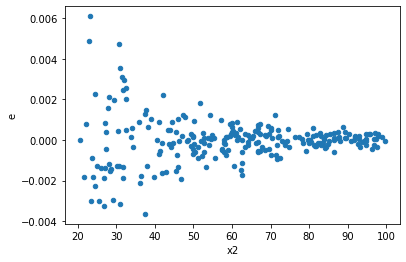

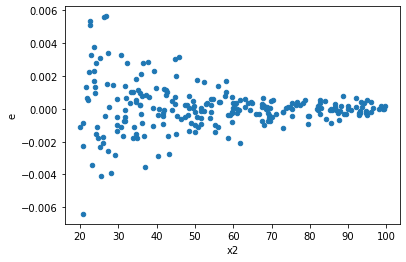

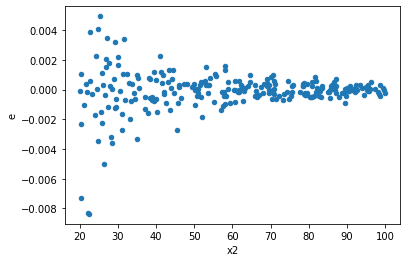

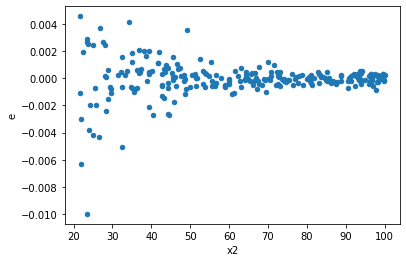

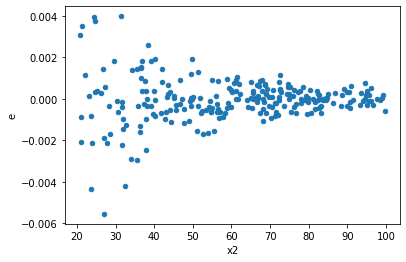

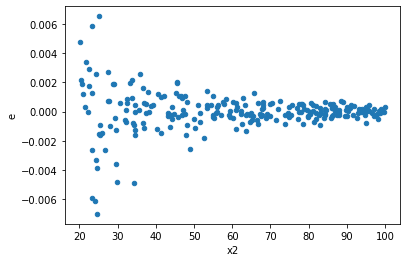

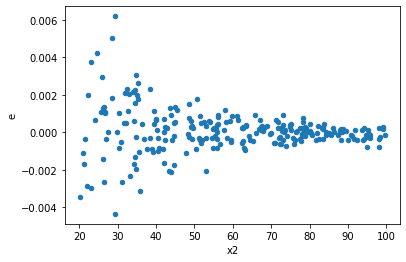

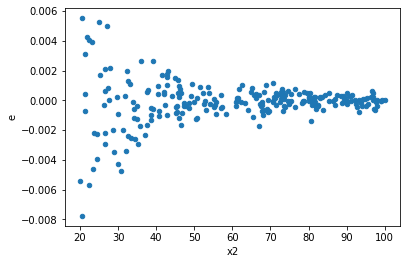

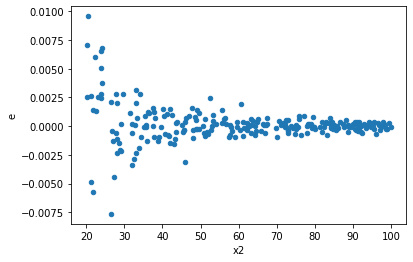

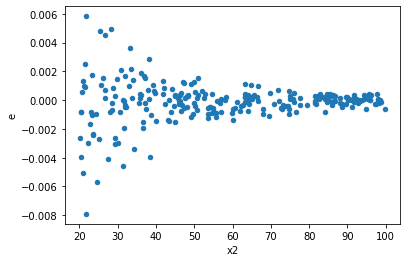

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.00032388980424018275,0.00013606660629889182,3.3390701468060076e-06,1.4027485185452766e-06,0.4201015423072431,2.7183395547944957e-05,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,0.0003258072826132147,5.40211962531466e-05,3.3588379650846875e-06,5.569195490015113e-07,0.16580720915707212,8.641511851717018e-17,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,0.0003940592349339869,4.2209199084590036e-05,4.062466339525639e-06,4.351463823153612e-07,0.1071138431552326,7.232259234244223e-24,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,0.0002756335496633453,8.733776090570008e-05,2.8415829862200544e-06,9.003892876876297e-07,0.31686186609856865,3.7841146800117e-08,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,0.000292143898750283,7.765195241311707e-05,3.011792770621474e-06,8.005355918878049e-07,0.2658003564178212,3.1415769167247005e-10,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,0.00027997306081403007,7.67305309207638e-05,2.8863202145776295e-06,7.910364012449877e-07,0.27406397850445857,7.502548523558411e-10,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,0.00048216800718513616,5.9410074025109036e-05,4.970804197784909e-06,6.124749899495777e-07,0.1232144670318153,1.6381599028149483e-21,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,0.0002910952658473271,4.825606530191614e-05,3.000982122137393e-06,4.974852092981045e-07,0.16577413295077548,8.581323686991301e-17,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,0.00046405228019791127,3.450361459071761e-05,4.784044125751662e-06,3.5570736691461456e-07,0.07435286079405179,2.5539951846688843e-30,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    991
Reject005=1 : Homoscedasticity        9
Name: Result_test, dtype: int64